In [29]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph 
from matplotlib import cm 
import matplotlib as mpl
import matplotlib.font_manager as fm
import operator

In [2]:
url = "https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=105&oid=015&aid=0004639419"


In [3]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
webpage = requests.get(f"{url}",headers=headers)
soup = BeautifulSoup(webpage.content,"html.parser")
title=soup.title.string
content=soup.find('div',attrs={'id':'dic_area'})
content=content.get_text().replace("\n","").replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}","").replace("\t","").replace(".",". ")

In [4]:
content

'롤러블 디스플레이가 탑재된 갤럭시워치의 예상 렌더링 이미지.  레츠고디지털 캡쳐차세대 스마트폰 폼팩터(특정 기기형태)로 화면이 돌돌 말리는 \'롤러블폰\'이 주목받는 가운데, 롤러블 디스플레이를 장착한 스마트워치도 출시될 것이란 관측이 나오고 있습니다. 정보기술(IT) 매체 렛츠고디지털은 삼성전자가 세계지식재산기구(WIPO)에 출원한 \'롤러블 디스플레이를 탑재한 전자장치\'에 대한 기술 특허가 최근 승인을 받고, 정식 공개됐다고 전했습니다. 해당 특허 문서에 따르면 해당 갤럭시 워치는 콤팩트한 크기의 두 개의 반원형 플렉서블 디스플레이가 탑재된 모습입니다.  평소엔 일반 갤럭시워치와 동일한 모습이지만, 측면 버튼을 누르면 두 디스플레이가 확장되는 형태인데요, 완전히 확장된 화면은 확장되기 전의 사이즈 보다 약 40% 커집니다. 삼성전자는 두 디스플레이 사이에 좁은 프레임을 끼웠습니다.  여기에 사진과 동영상을 캡처할 수 있는 카메라 센서와 플래시가 내장됐습니다.  이러한 방식을 통해 스마트폰이 없이 스마트워치 단독으로 사진과 동영상을 촬영할 수 있을 것으로 보입니다. 평소엔 시간과 간단한 알림 등을 보여줬던 갤럭시워치의 화면이 커지면 더 많은 정보를 보여줄 수 있을 것으로 예상됩니다.  예컨대 화면을 키워 상단 화면으로 콘텐츠를 이용하고, 하단 화면은 키보드로 활용하는 식입니다.  삼성전자는 특허 기술 설명에서 "롤러블 디스플레이가 활용되면 더 넓은 화면과 휴대성을 동시에 제공할 수 있고, 사용자 경험 개선 등 다양한 효과를 제공할 것"이라고 말했습니다. 삼성전자가 WIPO에 특허 출원한 \'롤러블 디스플레이를 탑재한 전자장치\' 모습.  레츠고디지털 캡쳐삼성전자가 이러한 콘셉트의 제품을 언제 시장에 내놓을 지는 알려지지 않았습니다.  특허를 출원했다고 해서 모든 제품이 정식 출시되는 것도 아니기 때문입니다.  다만 삼성전자의 자회사인 삼성디스플레이는 그간 여러 공식 석상에서 다양한 롤러블 디스플레이 시제품을 선보였던 만큼 롤러블 갤럭시워치도 출시될 가능성

In [5]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize

In [7]:
texts = content.split('.')
texts = [normalize(text, english=True, number=True) for text in texts]
print(texts)

['롤러블 디스플레이가 탑재된 갤럭시워치의 예상 렌더링 이미지', '레츠고디지털 캡쳐차세대 스마트폰 폼팩터 특정 기기형태 로 화면이 돌돌 말리는 롤러블폰 이 주목받는 가운데 롤러블 디스플레이를 장착한 스마트워치도 출시될 것이란 관측이 나오고 있습니다', '정보기술 IT 매체 렛츠고디지털은 삼성전자가 세계지식재산기구 WIPO 에 출원한 롤러블 디스플레이를 탑재한 전자장치 에 대한 기술 특허가 최근 승인을 받고 정식 공개됐다고 전했습니다', '해당 특허 문서에 따르면 해당 갤럭시 워치는 콤팩트한 크기의 두 개의 반원형 플렉서블 디스플레이가 탑재된 모습입니다', '평소엔 일반 갤럭시워치와 동일한 모습이지만 측면 버튼을 누르면 두 디스플레이가 확장되는 형태인데요 완전히 확장된 화면은 확장되기 전의 사이즈 보다 약 40 커집니다', '삼성전자는 두 디스플레이 사이에 좁은 프레임을 끼웠습니다', '여기에 사진과 동영상을 캡처할 수 있는 카메라 센서와 플래시가 내장됐습니다', '이러한 방식을 통해 스마트폰이 없이 스마트워치 단독으로 사진과 동영상을 촬영할 수 있을 것으로 보입니다', '평소엔 시간과 간단한 알림 등을 보여줬던 갤럭시워치의 화면이 커지면 더 많은 정보를 보여줄 수 있을 것으로 예상됩니다', '예컨대 화면을 키워 상단 화면으로 콘텐츠를 이용하고 하단 화면은 키보드로 활용하는 식입니다', '삼성전자는 특허 기술 설명에서 롤러블 디스플레이가 활용되면 더 넓은 화면과 휴대성을 동시에 제공할 수 있고 사용자 경험 개선 등 다양한 효과를 제공할 것 이라고 말했습니다', '삼성전자가 WIPO에 특허 출원한 롤러블 디스플레이를 탑재한 전자장치 모습', '레츠고디지털 캡쳐삼성전자가 이러한 콘셉트의 제품을 언제 시장에 내놓을 지는 알려지지 않았습니다', '특허를 출원했다고 해서 모든 제품이 정식 출시되는 것도 아니기 때문입니다', '다만 삼성전자의 자회사인 삼성디스플레이는 그간 여러 공식 석상에서 다양한 롤러블 디스플레이 시제품을 선보였던 만큼 롤러블 갤럭시워치도 출시될 가능

In [8]:
!pip install konlpy
from konlpy.tag import Okt
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
dataset = []
for i in range(len(texts)) :
  okt_pos = Okt().pos(texts[i], norm =True, stem = True)
  dataset.append([x for x, y in okt_pos if y in ['Noun']])
  i = i+1
dataset[:3]

[['롤러', '블', '디스플레이', '탑재', '갤럭시', '워치', '예상', '렌더링', '이미지'],
 ['레츠고',
  '디지털',
  '캡쳐',
  '차세대',
  '스마트폰',
  '폼팩터',
  '특정',
  '기기',
  '형태',
  '로',
  '화면',
  '롤러',
  '블폰',
  '이',
  '주목',
  '가운데',
  '롤러',
  '블',
  '디스플레이',
  '장',
  '스마트워치',
  '출시',
  '것',
  '관측'],
 ['정보기술',
  '매체',
  '렛츠고',
  '디지털',
  '전자',
  '세계',
  '지식',
  '재산',
  '기구',
  '출원',
  '롤러',
  '블',
  '디스플레이',
  '탑재',
  '전자',
  '장치',
  '대한',
  '기술',
  '특허',
  '최근',
  '승인',
  '정식',
  '공개',
  '전']]

In [10]:
count = {}   #동시출현 빈도가 저장될 dict
for line in dataset:
    #하나의 문서에서 동일한 단어가 두번 나와도 두번의 동시출현으로 고려X
    words = list(set(line))   
    #한줄씩 읽어와서 단어별로 분리(unique한 값으로 받아오기)
    #split은 띄어쓰기를 단어로 구분하라는 함수 
    
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1  

In [11]:
count.get(("a", "b"),0) #a, b라는 key가 없을 때는 디폴트를 0으로 해라 
count

{('갤럭시', '이미지'): 1,
 ('롤러', '이미지'): 1,
 ('블', '이미지'): 1,
 ('렌더링', '이미지'): 1,
 ('예상', '이미지'): 1,
 ('이미지', '탑재'): 1,
 ('워치', '이미지'): 1,
 ('디스플레이', '이미지'): 1,
 ('갤럭시', '롤러'): 2,
 ('갤럭시', '블'): 2,
 ('갤럭시', '렌더링'): 1,
 ('갤럭시', '예상'): 2,
 ('갤럭시', '탑재'): 2,
 ('갤럭시', '워치'): 5,
 ('갤럭시', '디스플레이'): 4,
 ('롤러', '블'): 6,
 ('렌더링', '롤러'): 1,
 ('롤러', '예상'): 1,
 ('롤러', '탑재'): 3,
 ('롤러', '워치'): 2,
 ('디스플레이', '롤러'): 6,
 ('렌더링', '블'): 1,
 ('블', '예상'): 1,
 ('블', '탑재'): 3,
 ('블', '워치'): 2,
 ('디스플레이', '블'): 7,
 ('렌더링', '예상'): 1,
 ('렌더링', '탑재'): 1,
 ('렌더링', '워치'): 1,
 ('디스플레이', '렌더링'): 1,
 ('예상', '탑재'): 1,
 ('예상', '워치'): 2,
 ('디스플레이', '예상'): 1,
 ('워치', '탑재'): 2,
 ('디스플레이', '탑재'): 5,
 ('디스플레이', '워치'): 4,
 ('레츠고', '스마트워치'): 1,
 ('스마트워치', '특정'): 1,
 ('스마트워치', '스마트폰'): 2,
 ('롤러', '스마트워치'): 1,
 ('스마트워치', '주목'): 1,
 ('스마트워치', '형태'): 1,
 ('스마트워치', '출시'): 1,
 ('스마트워치', '이'): 1,
 ('스마트워치', '폼팩터'): 1,
 ('블', '스마트워치'): 1,
 ('스마트워치', '캡쳐'): 1,
 ('로', '스마트워치'): 1,
 ('디스플레이', '스마트워치'): 1,
 ('블폰', '스마트워치'): 1,
 ('관측', '스마트워치

In [12]:
#dictionary형 자료형을 판다스 데이터프레임으로 만들어줌 
#orient=index를 넣어야 행으로 쭉 나열이 됨 
df=pd.DataFrame.from_dict(count, orient='index')
df.head()

,0
"(갤럭시, 이미지)",1
"(롤러, 이미지)",1
"(블, 이미지)",1
"(렌더링, 이미지)",1
"(예상, 이미지)",1


In [13]:
list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list1.append([df.index[i][0], df.index[i][1],df[0][i]])

In [14]:
#pandas 이용해서 df형태로 만들기 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])
df2.head()

,term1,term2,freq
0,갤럭시,이미지,1
1,롤러,이미지,1
2,블,이미지,1
3,렌더링,이미지,1
4,예상,이미지,1


In [15]:
#pandas 이용해서 sorting 하기 (디폴트가 오름차순이라서 false 꼭 써줘야 내림차순으로 나옴)
df3=df2.sort_values(by=['freq'],ascending=False)
df3 = df3.reset_index(drop=True)
df3.head()



,term1,term2,freq
0,디스플레이,블,7
1,디스플레이,롤러,6
2,롤러,출시,6
3,롤러,블,6
4,롤러,전자,6


In [16]:
#조건넣기, 빈도수 >=4
len((np.where(df3['freq']>=5))[0])

10

In [17]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [18]:
G=nx.Graph()
for i in range(len((np.where(df3['freq']>=4))[0])):
  G.add_edge(df3['term1'][i], df3['term2'][i],weight = int(df3['freq'][i]))

In [19]:
# Compute centralities for nodes.
# The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
dgr = nx.degree_centrality(G)
btw = nx.betweenness_centrality(G)
cls = nx.closeness_centrality(G)
pgr = nx.pagerank(G)                 # 페이지 랭크


In [20]:
# itemgetter(0): key 또는 itemgetter(1): value로 sort key, reverse=True (descending order)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1),reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1),reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

In [21]:
print("** degree **")
for x in range(9):
    print(sorted_dgr[x])

print("** betwenness **")
for x in range(9):
    print(sorted_btw[x])

print("** closeness **")
for x in range(9):
    print(sorted_cls[x])
print("pgr")
for x in range(9):
  print(sorted_pgr[x])

** degree **
('디스플레이', 0.7272727272727273)
('롤러', 0.5454545454545454)
('블', 0.2727272727272727)
('전자', 0.2727272727272727)
('특허', 0.2727272727272727)
('출시', 0.18181818181818182)
('갤럭시', 0.18181818181818182)
('워치', 0.18181818181818182)
('블폰', 0.18181818181818182)
** betwenness **
('디스플레이', 0.6363636363636364)
('롤러', 0.36363636363636365)
('특허', 0.18181818181818182)
('블', 0.0)
('출시', 0.0)
('전자', 0.0)
('갤럭시', 0.0)
('워치', 0.0)
('블폰', 0.0)
** closeness **
('디스플레이', 0.7857142857142857)
('롤러', 0.6875)
('특허', 0.5789473684210527)
('블', 0.55)
('전자', 0.55)
('갤럭시', 0.4782608695652174)
('워치', 0.4782608695652174)
('탑재', 0.4583333333333333)
('화면', 0.4583333333333333)
pgr
('디스플레이', 0.22131375088676603)
('롤러', 0.17540361754042627)
('블', 0.09198611085952761)
('전자', 0.08212216553037648)
('특허', 0.07967960963404032)
('출시', 0.06523214896985861)
('블폰', 0.060293051461920696)
('갤럭시', 0.06024108028681277)
('워치', 0.06024108028681277)


In [48]:

d = dict(G.degree)
low, *_, high = sorted(d.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Spectral)


In [35]:
options = {
     'edge_color': '#FFDEA2',
     'width': 1,
     'with_labels': True,
     'font_weight': 'regular',
}
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 5000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

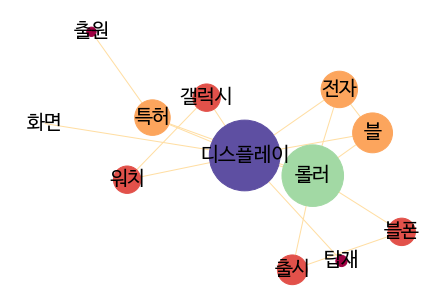

In [62]:
nx.draw(G, node_size=nsize, pos=nx.spring_layout(G, k=3.5, iterations=100), **options, font_family='NanumBarunGothic', font_size =20,
      node_color=[mapper.to_rgba(i) 
                    for i in d.values()] )  # font_family로 폰트 등록
plt.show()